### 1. Initialize project environemnt and create an agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In this environment, two agents control rackets to bounce a ball over a net. Thust he observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [4]:
import torch
from hyperparams  import *
from maddpg import Maddpg

agent = Maddpg(state_size, action_size, num_agents)

### 2. Train the agent and store trained model weights into checkpoint.pth file.

FYI: Instead of training the agent from sracth to run in project environment, it is possible to load the stored model weights of already trained agent from please skip steps 2 and 3 and jump directly to step 4.

In [5]:
from collections import deque

def maddpg(n_episodes=5000, max_t=10000, print_every=50):
    scores_deque = deque(maxlen=100)
    scores = []
    avg_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        agent_scores = np.zeros(num_agents) # storage for this episode scores for both agaents
        for t in range(max_t):
            actions=agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent_scores+= env_info.rewards                         # update the score (for each agent)
            agent.step(states, actions, rewards,next_states, dones)
            states = next_states
            if np.any(dones):                                  # exit loop if episode finished
                break

        episode_score = np.max(agent_scores)  # Consider the maximum score amongs all Agents
        scores_deque.append(episode_score)
        scores.append(episode_score)
        eval_window_avg_score = np.mean(scores_deque)
        avg_scores.append(eval_window_avg_score)
        total_episodes = min(i_episode , 100)
        print('\rEpisode {} score: {:.2f}, Average score over last {} episodes: {:.2f}'.format(i_episode, episode_score, total_episodes, eval_window_avg_score), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {} score: {:.2f}, Average score over last {} episodes: {:.2f}'.format(i_episode, episode_score, total_episodes, eval_window_avg_score))
        if eval_window_avg_score >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\t Average score over last {} episodes: {:.2f}'.format(i_episode, total_episodes, eval_window_avg_score))
            agent.save_weights()
            break
    return scores, avg_scores

scores, avg_scores = maddpg()

Episode 50 score: 0.00, Average score over last 50 episodes: 0.00
Episode 100 score: 0.00, Average score over last 100 episodes: 0.01
Episode 150 score: 0.00, Average score over last 100 episodes: 0.00
Episode 200 score: 0.00, Average score over last 100 episodes: 0.00
Episode 250 score: 0.00, Average score over last 100 episodes: 0.00
Episode 300 score: 0.00, Average score over last 100 episodes: 0.01
Episode 350 score: 0.00, Average score over last 100 episodes: 0.01
Episode 400 score: 0.00, Average score over last 100 episodes: 0.01
Episode 450 score: 0.00, Average score over last 100 episodes: 0.02
Episode 500 score: 0.00, Average score over last 100 episodes: 0.02
Episode 550 score: 0.00, Average score over last 100 episodes: 0.03
Episode 600 score: 0.00, Average score over last 100 episodes: 0.03
Episode 650 score: 0.00, Average score over last 100 episodes: 0.04
Episode 700 score: 0.00, Average score over last 100 episodes: 0.04
Episode 750 score: 0.00, Average score over last 1

### 3. Visualize results of agent's training

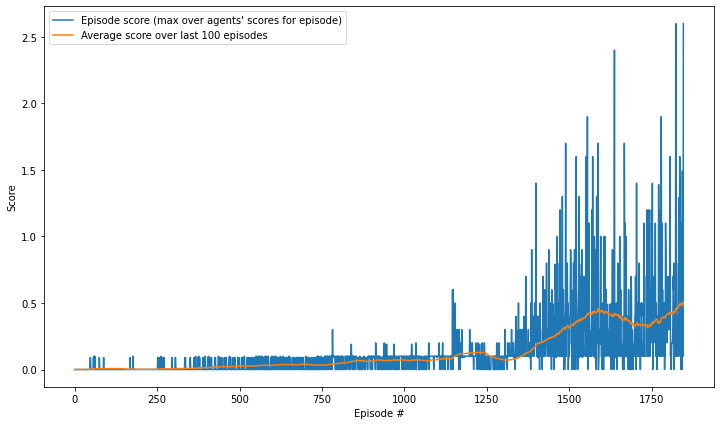

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
## Plot the scores
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(avg_scores)), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(('Episode score (max over agents\' scores for episode)', 'Average score over last 100 episodes'))

plt.show()

### 4. Run the Agents with pretrained model weights

Once this cell is executed, a Unity window with loaded project environemnt should pop up where the trained Agents can be observed in action, as they operate inside the environment. The 'experience' of the Agents is loaded from stored ''checkpoint_actor.pth' file. These files contains the weights of Agents' neural netowrk model learned during training phase, therefore no need to train the Agents every time from scratch.

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                    # get the current states
agent.reset()
agent.load_weights()
while True:
    actions = agent.act(states)            # let the agent select actions (don't add noise)
    env_info = env.step(actions)[brain_name]      # execute the selected actions and save the new information about the environment
    next_states = env_info.vector_observations    # get the resulting states
    dones = env_info.local_done                   # check whether episodes have finished
    states = next_states
    if np.any(dones):
        break 
env.close()